In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation
import string

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Bidirectional, Lambda, BatchNormalization, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten,Dropout, GlobalMaxPooling1D
from tensorflow.keras import layers, utils, callbacks, optimizers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tqdm import tqdm

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
train = pd.read_excel('/content/gdrive/MyDrive/Tesis/0.001/Dataset jkt train6.xlsx', engine='openpyxl')
train = train.astype(str)
val = pd.read_excel('/content/gdrive/MyDrive/Tesis/0.001/Dataset jkt val6.xlsx', engine='openpyxl')
val = val.astype(str)
test = pd.read_excel("/content/gdrive/MyDrive/Tesis/0.001/Dataset test jkt fix6.xlsx", engine='openpyxl')
test = test.astype(str)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from nltk import sent_tokenize  # Pastikan Anda telah menginstal nltk dengan 'pip install nltk'

# Contoh DataFrame

# Fungsi untuk menghitung total kalimat dari kolom DataFrame
def count_sentences(row):
    sentences = sent_tokenize(row['Kasus'])  # Menggunakan nltk.sent_tokenize
    return len(sentences)

# Menambahkan kolom baru 'Total Kalimat' ke dalam DataFrame
train['Total Kalimat'] = train.apply(count_sentences, axis=1)

# Menghitung total kalimat di seluruh DataFrame
total_kalimat_seluruh_dataframe = train['Total Kalimat'].sum()

# Menampilkan hasil
print("\nTotal Kalimat di Seluruh DataFrame:", total_kalimat_seluruh_dataframe)



Total Kalimat di Seluruh DataFrame: 648364


In [ ]:
import pandas as pd
from nltk import sent_tokenize  # Pastikan Anda telah menginstal nltk dengan 'pip install nltk'

# Contoh DataFrame

# Fungsi untuk menghitung total kalimat dari kolom DataFrame
def count_sentences(row):
    sentences = sent_tokenize(row['Isi'])  # Menggunakan nltk.sent_tokenize
    return len(sentences)

# Menambahkan kolom baru 'Total Kalimat' ke dalam DataFrame
train['Total Kalimat'] = train.apply(count_sentences, axis=1)

# Menghitung total kalimat di seluruh DataFrame
total_kalimat_seluruh_dataframe = train['Total Kalimat'].sum()

# Menampilkan hasil
print("\nTotal Kalimat di Seluruh DataFrame:", total_kalimat_seluruh_dataframe)


Total Kalimat di Seluruh DataFrame: 156712


In [ ]:
import pandas as pd
from nltk import sent_tokenize  # Pastikan Anda telah menginstal nltk dengan 'pip install nltk'

# Contoh DataFrame

# Fungsi untuk menghitung total kalimat dari kolom DataFrame
def count_sentences(row):
    sentences = sent_tokenize(row['Kasus'])  # Menggunakan nltk.sent_tokenize
    return len(sentences)

# Menambahkan kolom baru 'Total Kalimat' ke dalam DataFrame
val['Total Kalimat'] = val.apply(count_sentences, axis=1)

# Menghitung total kalimat di seluruh DataFrame
total_kalimat_seluruh_dataframe = val['Total Kalimat'].sum()

# Menampilkan hasil
print("\nTotal Kalimat di Seluruh DataFrame:", total_kalimat_seluruh_dataframe)


Total Kalimat di Seluruh DataFrame: 78392


In [ ]:
import pandas as pd
from nltk import sent_tokenize  # Pastikan Anda telah menginstal nltk dengan 'pip install nltk'

# Contoh DataFrame

# Fungsi untuk menghitung total kalimat dari kolom DataFrame
def count_sentences(row):
    sentences = sent_tokenize(row['Isi'])  # Menggunakan nltk.sent_tokenize
    return len(sentences)

# Menambahkan kolom baru 'Total Kalimat' ke dalam DataFrame
val['Total Kalimat'] = val.apply(count_sentences, axis=1)

# Menghitung total kalimat di seluruh DataFrame
total_kalimat_seluruh_dataframe = val['Total Kalimat'].sum()

# Menampilkan hasil
print("\nTotal Kalimat di Seluruh DataFrame:", total_kalimat_seluruh_dataframe)


Total Kalimat di Seluruh DataFrame: 19570


In [ ]:
import pandas as pd
from nltk import sent_tokenize  # Pastikan Anda telah menginstal nltk dengan 'pip install nltk'

# Contoh DataFrame

# Fungsi untuk menghitung total kalimat dari kolom DataFrame
def count_sentences(row):
    sentences = sent_tokenize(row['Kasus'])  # Menggunakan nltk.sent_tokenize
    return len(sentences)

# Menambahkan kolom baru 'Total Kalimat' ke dalam DataFrame
test['Total Kalimat'] = test.apply(count_sentences, axis=1)

# Menghitung total kalimat di seluruh DataFrame
total_kalimat_seluruh_dataframe = test['Total Kalimat'].sum()

# Menampilkan hasil
print("\nTotal Kalimat di Seluruh DataFrame:", total_kalimat_seluruh_dataframe)


Total Kalimat di Seluruh DataFrame: 86608


In [ ]:
import pandas as pd
from nltk import sent_tokenize  # Pastikan Anda telah menginstal nltk dengan 'pip install nltk'

# Contoh DataFrame

# Fungsi untuk menghitung total kalimat dari kolom DataFrame
def count_sentences(row):
    sentences = sent_tokenize(row['Isi'])  # Menggunakan nltk.sent_tokenize
    return len(sentences)

# Menambahkan kolom baru 'Total Kalimat' ke dalam DataFrame
test['Total Kalimat'] = test.apply(count_sentences, axis=1)

# Menghitung total kalimat di seluruh DataFrame
total_kalimat_seluruh_dataframe = test['Total Kalimat'].sum()

# Menampilkan hasil
print("\nTotal Kalimat di Seluruh DataFrame:", total_kalimat_seluruh_dataframe)


Total Kalimat di Seluruh DataFrame: 19608


In [ ]:
train.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang terang terangan tenaga kekerasan orang ...
1,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Diancam pidana penjara tujuh pencurian ternak ...
2,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang mengambil barang kepunyaan orang maksud...
3,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang sengaja melawan hukum memiliki barang k...
4,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Diancam pidana penjara sepuluh pidana denda pu...


In [ ]:
val.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang terang terangan tenaga kekerasan orang ...
1,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Diancam pidana penjara tujuh pencurian ternak ...
2,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang mengambil barang kepunyaan orang maksud...
3,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang sengaja melawan hukum memiliki barang k...
4,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Diancam pidana penjara sepuluh pidana denda pu...


In [ ]:
test.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang terang terangan tenaga kekerasan orang ...
1,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara tujuh pencurian ternak ...
2,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",1,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang mengambil barang kepunyaan orang maksud...
3,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang sengaja melawan hukum memiliki barang k...
4,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara sepuluh pidana denda pu...


# Preprocessing

In [ ]:
#train, test = train_test_split(data, stratify=data.is_duplicate, test_size=0.2)

In [ ]:
MAX_SEQUENCE_LENGTH = 30
EMBEDDING_DIM = 100

In [ ]:
corpus = []

feats = ['question1','question2']
for f in feats:
    train[f] = train[f].astype(str)
    val[f] = val[f].astype(str)
    test[f] = test[f].astype(str)
    corpus+=train[f].values.tolist()
    corpus+=val[f].values.tolist()
    corpus+=test[f].values.tolist()


tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
X_q1 = tokenizer.texts_to_sequences(train['question1'])
X_q2 = tokenizer.texts_to_sequences(train['question2'])

X_val_q1 = tokenizer.texts_to_sequences(val['question1'])
X_val_q2 = tokenizer.texts_to_sequences(val['question2'])

X_test_q1 = tokenizer.texts_to_sequences(test['question1'])
X_test_q2 = tokenizer.texts_to_sequences(test['question2'])


X_q1 = pad_sequences(X_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_q2 = pad_sequences(X_q2, maxlen=MAX_SEQUENCE_LENGTH)
X_val_q1 = pad_sequences(X_val_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_val_q2 = pad_sequences(X_val_q2, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q1 = pad_sequences(X_test_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q2 = pad_sequences(X_test_q2, maxlen=MAX_SEQUENCE_LENGTH)

#y = train['Kemiripan'].values

word_index = tokenizer.word_index
nb_words = len(word_index)+1

# Word Embedding

In [ ]:
import re, nltk, gensim
# Loading pre-trained word vectors
def load_embedding(EMBEDDING_FILE,embedding_dim):
  word2vec_model = gensim.models.KeyedVectors.\
  load_word2vec_format(EMBEDDING_FILE, binary = True)
  w2v = dict(zip(word2vec_model.index_to_key,\
                 word2vec_model.vectors))

# This will be the embedding matrix
  embeddings = 1 * np.random.randn(len(word_index) \
                                   + 1, embedding_dim)
  embeddings[0] = 0  # So that the padding will be ignored


# Build the embedding matrix
  for word, index in word_index.items():
      if word in word2vec_model.index_to_key:
          embeddings[index] = word2vec_model.get_vector(word)
  return embeddings

embedding_dim=100
EMBEDDING_FILE = '/content/gdrive/MyDrive/Tesis/0.001/word2vec_model_jkt_wiki6.bin'

embeddings=load_embedding(EMBEDDING_FILE,embedding_dim)

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
#X_train_q1,X_val_q1,X_train_q2,X_val_q2,y_train,y_val = train_test_split(X_q1,X_q2,y,train_size=0.8,random_state=1024)
print(X_q1.shape,X_val_q1.shape,X_test_q1.shape)
X_train = [X_q1,X_q2]
X_val = [X_val_q1,X_val_q2]
X_test = [X_test_q1,X_test_q2]

(82480, 30) (10300, 30) (10320, 30)


In [ ]:
y_train = train['Kemiripan'].values
y_val = val['Kemiripan'].values
y_test = test['Kemiripan'].values

In [ ]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

## Euclidean distance and Cosine distance

In [ ]:
#Cosine distance
#def cosine_distance(output):
#  x, y= output[0],output[1]
#  x = K.l2_normalize(x, axis=-1)
#  y = K.l2_normalize(y, axis=-1)
#  return -K.mean(x * y, axis=-1, keepdims=True)

def cosine_distance(inputs):
    x, y = inputs
    x = tf.keras.backend.l2_normalize(x, axis=-1)
    y = tf.keras.backend.l2_normalize(y, axis=-1)
    return tf.keras.backend.sum(x * y, axis=-1, keepdims=True)

def euclidean_distance(output):
    x, y = output[0],output[1]
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [ ]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.metrics import Precision, Recall

# BiLSTM

## DropOut 0.2

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer1 = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
embedding_layer2 = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer1(input_q1)
embedded_sequences_q2 = embedding_layer2(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.2)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.2)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model11 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model11.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model11.summary()
utils.plot_model(model11, show_shapes=True, expand_nested=True)
cp11=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_02.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_43 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_44 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_31 (Embedding)    (None, 30, 100)              2726000   ['input_43[0][0]']            
                                                                                                  
 embedding_32 (Embedding)    (None, 30, 100)              2726000   ['input_44[0][0]']            
                                                                                           

In [ ]:
history_w2v_bilstm = model11.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp11]
)

Epoch 1/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1828 - accuracy: 0.9495 - precision_21: 0.1613 - recall_21: 0.0024
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_02.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 52s 17ms/step - loss: 0.1828 - accuracy: 0.9495 - precision_21: 0.1613 - recall_21: 0.0024 - val_loss: 0.1246 - val_accuracy: 0.9553 - val_precision_21: 0.9661 - val_recall_21: 0.1107
Epoch 2/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9603 - precision_21: 0.9266 - recall_21: 0.2236
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_02.hdf5
2578/2578 [==============================] - 34s 13ms/step - loss: 0.1060 - accuracy: 0.9603 - precision_21: 0.9266 - recall_21: 0.2236 - val_loss: 0.0864 - val_accuracy: 0.9743 - val_precision_21: 0.8882 - val_recall_21: 0.5553
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy: 0.9729 - precision_21: 0.8868 - recall_21: 0.5246
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_02.hdf5
2578/2578 [==============================] - 35s 13ms/step - loss:

In [ ]:
y_pred_test = model11.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission11 = test.copy()
submission11['Kemiripan'] = submission11['Kemiripan'].astype('float32')
submission11['predict'] = y_pred_test
submission11['predict'] = submission11['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission11.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_02.csv',index=False)

323/323 [==============================] - 3s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.2')
print('---------------------------')
print(classification_report(submission11['Kemiripan'],submission11['predict']))
print('---------------------------')

Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.2
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.77      0.77      0.77       516

    accuracy                           0.98     10320
   macro avg       0.88      0.88      0.88     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission11['Accuracy'] = (submission11['Kemiripan'] == submission11['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission11['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9767441860465116


In [ ]:
submission11 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_02.csv')
submission11 = submission11.astype(str)

In [ ]:
df = submission11

# Menambahkan kolom baru 'C' sesuai aturan yang diberikan
df['koreksi'] = (df['Kemiripan'] == '1.0') & (df['predict'] == '1.0')

# Mengganti nilai True/False dengan 1/0
df['koreksi'] = df['koreksi'].astype(int)

# Mengurutkan DataFrame berdasarkan kolom 'C' secara descending
df = df.sort_values(by='koreksi', ascending=False)
df = df.astype(str)

In [ ]:
import pandas as pd

#df = submission31

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['koreksi']:
            if prediction == '1':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.1530097087378652

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.0765048543689326

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.0382524271844663



## DropOut 0.3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.3)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.3)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model12 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model12.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model12.summary()
utils.plot_model(model12, show_shapes=True, expand_nested=True)
cp12=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_03.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_39 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_40 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_29 (Embedding)    (None, 30, 100)              2726000   ['input_39[0][0]',            
                                                                     'input_40[0][0]']            
                                                                                                  
 bidirectional_28 (Bidirect  (None, 516)                  740976    ['embedding_29[0][0]', 

In [ ]:
history_w2v_bilstm = model12.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp12]
)

Epoch 1/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.9495 - precision_19: 0.0638 - recall_19: 7.2780e-04
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_03.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 43s 14ms/step - loss: 0.1917 - accuracy: 0.9495 - precision_19: 0.0638 - recall_19: 7.2745e-04 - val_loss: 0.1253 - val_accuracy: 0.9546 - val_precision_19: 0.9796 - val_recall_19: 0.0932
Epoch 2/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1141 - accuracy: 0.9566 - precision_19: 0.8932 - recall_19: 0.1501
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_03.hdf5
2578/2578 [==============================] - 34s 13ms/step - loss: 0.1141 - accuracy: 0.9566 - precision_19: 0.8932 - recall_19: 0.1501 - val_loss: 0.0792 - val_accuracy: 0.9743 - val_precision_19: 0.7717 - val_recall_19: 0.6893
Epoch 3/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.0870 - accuracy: 0.9690 - precision_19: 0.8655 - recall_19: 0.4500
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_03.hdf5
2578/2578 [==============================] - 35s 13ms/step - l

In [ ]:
y_pred_test = model12.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission12 = test.copy()
submission12['Kemiripan'] = submission12['Kemiripan'].astype('float32')
submission12['predict'] = y_pred_test
submission12['predict'] = submission12['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission12.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_03.csv',index=False)

323/323 [==============================] - 3s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.3')
print('---------------------------')
print(classification_report(submission12['Kemiripan'],submission12['predict']))
print('---------------------------')

Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.3
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      9804
         1.0       0.72      0.79      0.75       516

    accuracy                           0.97     10320
   macro avg       0.85      0.89      0.87     10320
weighted avg       0.98      0.97      0.97     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission12['Accuracy'] = (submission12['Kemiripan'] == submission12['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission12['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9738372093023255


In [ ]:
submission12 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_03.csv')
submission12 = submission12.astype(str)

## DropOut 0.5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.5)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.5)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model13 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model13.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model13.summary()
utils.plot_model(model13, show_shapes=True, expand_nested=True)
cp13=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_05.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_41 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_42 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_30 (Embedding)    (None, 30, 100)              2726000   ['input_41[0][0]',            
                                                                     'input_42[0][0]']            
                                                                                                  
 bidirectional_29 (Bidirect  (None, 516)                  740976    ['embedding_30[0][0]', 

In [ ]:
history_w2v_bilstm = model13.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp13]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9500 - precision_20: 0.0000e+00 - recall_20: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_05.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 54s 19ms/step - loss: 0.2077 - accuracy: 0.9500 - precision_20: 0.0000e+00 - recall_20: 0.0000e+00 - val_loss: 0.2328 - val_accuracy: 0.9500 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00
Epoch 2/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.1982 - accuracy: 0.9500 - precision_20: 0.0000e+00 - recall_20: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_05.hdf5
2578/2578 [==============================] - 34s 13ms/step - loss: 0.1982 - accuracy: 0.9500 - precision_20: 0.0000e+00 - recall_20: 0.0000e+00 - val_loss: 0.2376 - val_accuracy: 0.9500 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00
Epoch 3/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1981 - accuracy: 0.9500 - precision_20: 0.0000e+00 - recall_20: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_05.hdf5
2578/2578 [=======

In [ ]:
y_pred_test = model13.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission13 = test.copy()
submission13['Kemiripan'] = submission13['Kemiripan'].astype('float32')
submission13['predict'] = y_pred_test
submission13['predict'] = submission13['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission13.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_05.csv',index=False)

323/323 [==============================] - 4s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.5')
print('---------------------------')
print(classification_report(submission13['Kemiripan'],submission13['predict']))
print('---------------------------')

Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.5
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.00      0.00      0.00       516

    accuracy                           0.95     10320
   macro avg       0.47      0.50      0.49     10320
weighted avg       0.90      0.95      0.93     10320

---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assign values to Accuracy column based on conditions
submission13['Accuracy'] = (submission13['Kemiripan'] == submission13['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission13['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.95


In [ ]:
submission13 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_05.csv')
submission13 = submission13.astype(str)

## DropOut 0.7

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.7)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.7)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model14 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model14.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model14.summary()
utils.plot_model(model14, show_shapes=True, expand_nested=True)
cp14=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_07.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_22 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_16 (Embedding)    (None, 30, 100)              2726000   ['input_21[0][0]',            
                                                                     'input_22[0][0]']            
                                                                                                  
 bidirectional_16 (Bidirect  (None, 516)                  740976    ['embedding_16[0][0]', 

In [ ]:
history_w2v_bilstm = model14.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp14]
)

Epoch 1/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.3219 - accuracy: 0.9499 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_07.hdf5
2578/2578 [==============================] - 49s 14ms/step - loss: 0.3219 - accuracy: 0.9500 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_loss: 0.2109 - val_accuracy: 0.9500 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9500 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_bilstm_w2v_train_20ep_07.hdf5
2578/2578 [==============================] - 35s 14ms/step - loss: 0.2021 - accuracy: 0.9500 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_loss: 0.2417 - val_accuracy: 0.9500 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/20
2577/25

In [ ]:
y_pred_test = model14.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission14 = test.copy()
submission14['Kemiripan'] = submission14['Kemiripan'].astype('float32')
submission14['predict'] = y_pred_test
submission14['predict'] = submission14['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission14.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_07.csv',index=False)

323/323 [==============================] - 4s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.7')
print('---------------------------')
print(classification_report(submission14['Kemiripan'],submission14['predict']))
print('---------------------------')

Model Metrics for Word2Vec+BiLSTM 20 Epoch 0.7
---------------------------
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      9804
         1.0       0.78      0.31      0.44       516

    accuracy                           0.96     10320
   macro avg       0.87      0.65      0.71     10320
weighted avg       0.96      0.96      0.95     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission14['Accuracy'] = (submission14['Kemiripan'] == submission14['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission14['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9611434108527132


In [ ]:
submission14 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_bilstm_07.csv')
submission14 = submission14.astype(str)

# CNN

## Kernel 2

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 30, 100)              2726000   ['input_9[0][0]']             
                                                                                                  
 embedding_6 (Embedding)     (None, 30, 100)              2726000   ['input_10[0][0]']            
                                                                                            

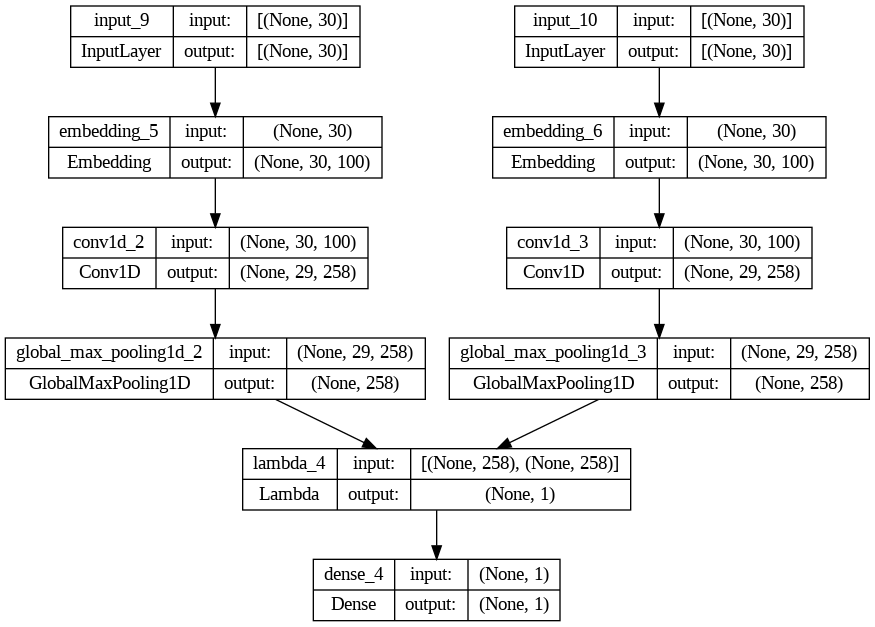

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer1 = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
embedding_layer2 = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer1(input_q1)
embedded_sequences_q2 = embedding_layer2(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 2
conv_layer1 = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')
conv_layer2 = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')
# Apply Convolutional layers to the embedded sequences
x1 = conv_layer1(embedded_sequences_q1)
x2 = conv_layer2(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model21 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model21.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model21.summary()
utils.plot_model(model21, show_shapes=True, expand_nested=True)
cp21=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_2.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

In [ ]:
history_w2v_cnn = model21.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp21]
)

Epoch 1/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1814 - accuracy: 0.9500 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_2.hdf5
2578/2578 [==============================] - 18s 4ms/step - loss: 0.1814 - accuracy: 0.9500 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00 - val_loss: 0.1477 - val_accuracy: 0.9500 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 2/20
  26/2578 [..............................] - ETA: 10s - loss: 0.1379 - accuracy: 0.9591 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2575/2578 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9500 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_2.hdf5
2578/2578 [==============================] - 11s 4ms/step - loss: 0.1354 - accuracy: 0.9500 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00 - val_loss: 0.1245 - val_accuracy: 0.9500 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 3/20
2570/2578 [============================>.] - ETA: 0s - loss: 0.1149 - accuracy: 0.9500 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_2.hdf5
2578/2578 [==============================] - 12s 5ms/step - loss: 0.1149 - accuracy: 0.9500 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00 - val_loss: 0.1064 - val_accuracy: 0.9500 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 4/20
2576/2578 [============================>

In [ ]:
y_pred_test = model21.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission21 = test.copy()
submission21['Kemiripan'] = submission21['Kemiripan'].astype('float32')
submission21['predict'] = y_pred_test
submission21['predict'] = submission21['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission21.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_2.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN 20 Epoch 2')
print('---------------------------')
print(classification_report(submission21['Kemiripan'],submission21['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN 20 Epoch 2
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.79      0.74      0.77       516

    accuracy                           0.98     10320
   macro avg       0.89      0.86      0.88     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission21['Accuracy'] = (submission21['Kemiripan'] == submission21['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission21['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9773255813953489


In [ ]:
submission21 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_2.csv')
submission21 = submission21.astype(str)

## Kernel 3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 3
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model22 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model22.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model22.summary()
utils.plot_model(model22, show_shapes=True, expand_nested=True)
cp22=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_3.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 30, 100)              2726000   ['input_15[0][0]',            
                                                                     'input_16[0][0]']            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 28, 258)              77658     ['embedding_7[0][0]',   

In [ ]:
history_w2v_cnn = model22.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp22]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.9394 - precision_7: 0.1774 - recall_7: 0.0582
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_3.hdf5
2578/2578 [==============================] - 13s 4ms/step - loss: 0.3778 - accuracy: 0.9394 - precision_7: 0.1774 - recall_7: 0.0582 - val_loss: 0.2139 - val_accuracy: 0.9500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/20
  26/2578 [..............................] - ETA: 10s - loss: 0.2131 - accuracy: 0.9543 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - ETA: 0s - loss: 0.1590 - accuracy: 0.9500 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_3.hdf5
2578/2578 [==============================] - 11s 4ms/step - loss: 0.1590 - accuracy: 0.9500 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - val_loss: 0.1219 - val_accuracy: 0.9500 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1040 - accuracy: 0.9673 - precision_7: 0.9240 - recall_7: 0.3776
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_3.hdf5
2578/2578 [==============================] - 12s 5ms/step - loss: 0.1040 - accuracy: 0.9673 - precision_7: 0.9240 - recall_7: 0.3775 - val_loss: 0.0891 - val_accuracy: 0.9783 - val_precision_7: 0.9124 - val_recall_7: 0.6272
Epoch 4/20
2572/2578 [============================>.] - ETA: 0s - loss: 0.0

In [ ]:
y_pred_test = model22.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission22 = test.copy()
submission22['Kemiripan'] = submission22['Kemiripan'].astype('float32')
submission22['predict'] = y_pred_test
submission22['predict'] = submission22['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission22.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_3.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN 20 Epoch 3')
print('---------------------------')
print(classification_report(submission22['Kemiripan'],submission22['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN 20 Epoch 3
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.80      0.73      0.76       516

    accuracy                           0.98     10320
   macro avg       0.89      0.86      0.87     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission22['Accuracy'] = (submission22['Kemiripan'] == submission22['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission22['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9770348837209303


In [ ]:
submission22 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_3.csv')
submission22 = submission22.astype(str)

## Kernel 4

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 4
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model23 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model23.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model23.summary()
utils.plot_model(model23, show_shapes=True, expand_nested=True)
cp23=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_4.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_18 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 30, 100)              2726000   ['input_17[0][0]',            
                                                                     'input_18[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 27, 258)              103458    ['embedding_8[0][0]',   

In [ ]:
history_w2v_cnn = model23.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp23]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.3769 - accuracy: 0.9492 - precision_8: 0.4846 - recall_8: 0.2597
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_4.hdf5
2578/2578 [==============================] - 13s 4ms/step - loss: 0.3769 - accuracy: 0.9492 - precision_8: 0.4846 - recall_8: 0.2597 - val_loss: 0.2047 - val_accuracy: 0.9500 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 2/20
  27/2578 [..............................] - ETA: 10s - loss: 0.1989 - accuracy: 0.9502 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2577/2578 [============================>.] - ETA: 0s - loss: 0.1536 - accuracy: 0.9663 - precision_8: 0.9190 - recall_8: 0.3574
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_4.hdf5
2578/2578 [==============================] - 11s 4ms/step - loss: 0.1536 - accuracy: 0.9663 - precision_8: 0.9190 - recall_8: 0.3574 - val_loss: 0.1171 - val_accuracy: 0.9729 - val_precision_8: 0.8172 - val_recall_8: 0.5903
Epoch 3/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.0995 - accuracy: 0.9748 - precision_8: 0.8860 - recall_8: 0.5697
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_4.hdf5
2578/2578 [==============================] - 11s 4ms/step - loss: 0.0995 - accuracy: 0.9748 - precision_8: 0.8861 - recall_8: 0.5696 - val_loss: 0.0873 - val_accuracy: 0.9755 - val_precision_8: 0.8949 - val_recall_8: 0.5786
Epoch 4/20
2571/2578 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9777 -

In [ ]:
y_pred_test = model23.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission23 = test.copy()
submission23['Kemiripan'] = submission23['Kemiripan'].astype('float32')
submission23['predict'] = y_pred_test
submission23['predict'] = submission23['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission23.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_4.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN 20 Epoch 4')
print('---------------------------')
print(classification_report(submission23['Kemiripan'],submission23['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN 20 Epoch 4
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.84      0.76      0.80       516

    accuracy                           0.98     10320
   macro avg       0.91      0.88      0.89     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission23['Accuracy'] = (submission23['Kemiripan'] == submission23['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission23['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9805232558139535


In [ ]:
submission23 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_4.csv')
submission23 = submission23.astype(str)

## Kernel 5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 5
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model24 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model24.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model24.summary()
utils.plot_model(model24, show_shapes=True, expand_nested=True)
cp24=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_5.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_20 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 30, 100)              2726000   ['input_19[0][0]',            
                                                                     'input_20[0][0]']            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 26, 258)              129258    ['embedding_9[0][0]',   

In [ ]:
history_w2v_cnn = model24.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp24]
)

Epoch 1/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1761 - accuracy: 0.9500 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_5.hdf5
2578/2578 [==============================] - 13s 4ms/step - loss: 0.1761 - accuracy: 0.9500 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_loss: 0.1387 - val_accuracy: 0.9500 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/20
  26/2578 [..............................] - ETA: 10s - loss: 0.1499 - accuracy: 0.9459 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2571/2578 [============================>.] - ETA: 0s - loss: 0.1248 - accuracy: 0.9500 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_5.hdf5
2578/2578 [==============================] - 12s 5ms/step - loss: 0.1248 - accuracy: 0.9500 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_loss: 0.1136 - val_accuracy: 0.9500 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 3/20
2572/2578 [============================>.] - ETA: 0s - loss: 0.1011 - accuracy: 0.9500 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn_w2v_train_20ep_5.hdf5
2578/2578 [==============================] - 12s 5ms/step - loss: 0.1010 - accuracy: 0.9500 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_loss: 0.0934 - val_accuracy: 0.9500 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 4/20
2576/2578 [============================>

In [ ]:
y_pred_test = model24.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission24 = test.copy()
submission24['Kemiripan'] = submission24['Kemiripan'].astype('float32')
submission24['predict'] = y_pred_test
submission24['predict'] = submission24['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission24.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_5.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN 20 Epoch 5')
print('---------------------------')
print(classification_report(submission24['Kemiripan'],submission24['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN 20 Epoch 5
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.84      0.76      0.79       516

    accuracy                           0.98     10320
   macro avg       0.91      0.87      0.89     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission24['Accuracy'] = (submission24['Kemiripan'] == submission24['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission24['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9804263565891473


In [ ]:
submission24 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnn_5.csv')
submission24 = submission24.astype(str)

# CNN-BiLSTM

## Kernel 2 DropOut 0.2

In [ ]:
from tensorflow.keras.layers import concatenate

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer1 = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
embedding_layer2 = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer1(input_q1)
embedded_sequences_q2 = embedding_layer2(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 2
conv_layer1 = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')
conv_layer2 = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')
# Apply Convolutional layers to the embedded sequences
x1 = conv_layer1(embedded_sequences_q1)
x2 = conv_layer2(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer1 = Bidirectional(LSTM(lstm_units, return_sequences=False))
lstm_layer2 = Bidirectional(LSTM(lstm_units, return_sequences=False))
# Apply LSTM layers to the embedded sequences
x1 = lstm_layer1(x1)
x1 = Dropout(0.2)(x1)
x2 = lstm_layer2(x2)
x2 = Dropout(0.2)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model31 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model31.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model31.summary()
utils.plot_model(model31, show_shapes=True, expand_nested=True)
cp31=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_2_02.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 30, 100)              2726000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 30, 100)              2726000   ['input_2[0][0]']             
                                                                                              

In [ ]:
history_w2v_cnnbilstm = model31.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp31]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.9500 - precision_2: 0.3333 - recall_2: 7.2780e-04
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_2_02.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 48s 16ms/step - loss: 0.2526 - accuracy: 0.9500 - precision_2: 0.3333 - recall_2: 7.2745e-04 - val_loss: 0.1761 - val_accuracy: 0.9500 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1534 - accuracy: 0.9505 - precision_2: 0.9783 - recall_2: 0.0109
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_2_02.hdf5
2578/2578 [==============================] - 40s 16ms/step - loss: 0.1534 - accuracy: 0.9505 - precision_2: 0.9783 - recall_2: 0.0109 - val_loss: 0.1098 - val_accuracy: 0.9583 - val_precision_2: 0.9388 - val_recall_2: 0.1786
Epoch 3/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.1036 - accuracy: 0.9627 - precision_2: 0.9440 - recall_2: 0.2699
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_2_02.hdf5
2578/2578 [==============================] - 39s 15ms/

In [ ]:
y_pred_test = model31.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission31 = test.copy()
submission31['Kemiripan'] = submission31['Kemiripan'].astype('float32')
submission31['predict'] = y_pred_test
submission31['predict'] = submission31['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission31.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_2_02.csv',index=False)

323/323 [==============================] - 3s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 2 0.2')
print('---------------------------')
print(classification_report(submission31['Kemiripan'],submission31['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 2 0.2
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.82      0.80      0.81       516

    accuracy                           0.98     10320
   macro avg       0.90      0.90      0.90     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission31['Accuracy'] = (submission31['Kemiripan'] == submission31['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission31['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9811046511627907


In [ ]:
submission31 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_2_02.csv')
submission31 = submission31.astype(str)

## Kernel 3 DropOut 0.3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 128
kernel_size = 3
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 128
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.3)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.3)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model32 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model32.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model32.summary()
utils.plot_model(model32, show_shapes=True, expand_nested=True)
cp32=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_3_03.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 30, 100)              2726000   ['input_3[0][0]',             
                                                                     'input_4[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 28, 128)              38528     ['embedding_1[0][0]',   

In [ ]:
history_w2v_cnnbilstm = model32.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp32]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2795 - accuracy: 0.9484 - precision_1: 0.0784 - recall_1: 0.0029
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_3_03.hdf5
2578/2578 [==============================] - 618s 236ms/step - loss: 0.2795 - accuracy: 0.9484 - precision_1: 0.0784 - recall_1: 0.0029 - val_loss: 0.1769 - val_accuracy: 0.9500 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - ETA: 0s - loss: 0.1598 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_3_03.hdf5
2578/2578 [==============================] - 588s 228ms/step - loss: 0.1598 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.1104 - val_accuracy: 0.9617 - val_precision_1: 0.8854 - val_recall_1: 0.2699
Epoch 3/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1093 - accuracy: 0.9560 - precision_1: 0.9459 - recall_1: 0.1273
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_3_03.hdf5
2578/2578 [==============================] - 596s 231ms/step - loss: 0.1093 - accuracy: 0.9560 - precision_1: 0.9459 - recall_1: 0.1273 - val_loss: 0.0706 - val_accuracy: 0.9833 - val_precision_1: 0.8924 - val_recall_1: 0.7573
Epoch 4/20
2578/2578 [==============================] - E

In [ ]:
y_pred_test = model32.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission32 = test.copy()
submission32['Kemiripan'] = submission32['Kemiripan'].astype('float32')
submission32['predict'] = y_pred_test
submission32['predict'] = submission32['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission32.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_3_03.csv',index=False)

323/323 [==============================] - 25s 72ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 3 0.3')
print('---------------------------')
print(classification_report(submission32['Kemiripan'],submission32['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 3 0.3
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.78      0.84      0.81       516

    accuracy                           0.98     10320
   macro avg       0.89      0.91      0.90     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission32['Accuracy'] = (submission32['Kemiripan'] == submission32['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission32['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9802325581395349


In [ ]:
submission32 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_3_03.csv')
submission32 = submission32.astype(str)

## Kernel 4 DropOut 0.5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 128
kernel_size = 4
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 128
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.5)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.5)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model33 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model33.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model33.summary()
utils.plot_model(model33, show_shapes=True, expand_nested=True)
cp33=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_4_05.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 30, 100)              2726000   ['input_5[0][0]',             
                                                                     'input_6[0][0]']             
                                                                                                  
 conv1d_2 (Conv1D)           (None, 27, 128)              51328     ['embedding_2[0][0]',   

In [ ]:
history_w2v_cnnbilstm = model33.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp33]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.3028 - accuracy: 0.9477 - precision_2: 0.0472 - recall_2: 0.0024
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_4_05.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 612s 234ms/step - loss: 0.3028 - accuracy: 0.9477 - precision_2: 0.0472 - recall_2: 0.0024 - val_loss: 0.1759 - val_accuracy: 0.9500 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1816 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_4_05.hdf5
2578/2578 [==============================] - 579s 224ms/step - loss: 0.1816 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.1653 - val_accuracy: 0.9372 - val_precision_2: 0.3429 - val_recall_2: 0.2796
Epoch 3/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_4_05.hdf5
2578/2578 [===================

In [ ]:
from tensorflow.keras.models import load_model
model33 = load_model('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_4_05.hdf5')

In [ ]:
y_pred_test = model33.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission33 = test.copy()
submission33['Kemiripan'] = submission33['Kemiripan'].astype('float32')
submission33['predict'] = y_pred_test
submission33['predict'] = submission33['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission33.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_4_05.csv',index=False)

323/323 [==============================] - 21s 59ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 4 0.5')
print('---------------------------')
print(classification_report(submission33['Kemiripan'],submission33['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 4 0.5
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      9804
         1.0       0.75      0.87      0.81       516

    accuracy                           0.98     10320
   macro avg       0.87      0.93      0.90     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission33['Accuracy'] = (submission33['Kemiripan'] == submission33['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission33['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.978875968992248


In [ ]:
submission33 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_4_05.csv')
submission33 = submission33.astype(str)

## Kernel 5 DropOut 0.7

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 128
kernel_size = 5
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 128
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.7)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.7)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model34 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model34.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model34.summary()
utils.plot_model(model34, show_shapes=True, expand_nested=True)
cp34=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_5_07.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 30, 100)              2726000   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 26, 128)              64128     ['embedding[0][0]',       

In [ ]:
history_w2v_cnnbilstm = model34.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp34]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.3470 - accuracy: 0.9486 - precision: 0.0469 - recall: 0.0015
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_5_07.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - 635s 242ms/step - loss: 0.3470 - accuracy: 0.9486 - precision: 0.0469 - recall: 0.0015 - val_loss: 0.1819 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1930 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_5_07.hdf5
2578/2578 [==============================] - 587s 228ms/step - loss: 0.1930 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1952 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1772 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.001/model_cnn-bilstm_w2v_train_20ep_5_07.hdf5
2578/2578 [==============================] - 5

In [ ]:
y_pred_test = model34.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission34 = test.copy()
submission34['Kemiripan'] = submission34['Kemiripan'].astype('float32')
submission34['predict'] = y_pred_test
submission34['predict'] = submission34['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission34.to_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_5_07.csv',index=False)

323/323 [==============================] - 22s 62ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 5 0.7')
print('---------------------------')
print(classification_report(submission34['Kemiripan'],submission34['predict']))
print('---------------------------')

Model Metrics for Word2Vec+CNN-BiLSTM 20 Epoch 5 0.7
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      9804
         1.0       0.46      0.82      0.59       516

    accuracy                           0.94     10320
   macro avg       0.72      0.89      0.78     10320
weighted avg       0.96      0.94      0.95     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission34['Accuracy'] = (submission34['Kemiripan'] == submission34['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission34['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9422480620155039


In [ ]:
submission34 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.001/submission_w2v_cnnbilstm_5_07.csv')
submission34 = submission34.astype(str)